In [18]:
def ddmm_mmmm_to_decimal(coord):
    # Assuming coord is in the format 'ddmm.mmmm'
    
    # Extract degrees and decimal minutes
    degrees = int(coord[:-8])
    decimal_minutes = float(coord[-8:])
    
    # Convert decimal minutes to decimal degrees
    decimal_degrees = degrees + decimal_minutes / 60
    
    return decimal_degrees

In [72]:
import csv 
import pandas as pd

# convert to array
with open('../E-Jeep Data/data_2023-11-04.csv', 'r', encoding='utf-8') as csv_file:
    csv_reader = csv.reader(csv_file)
    data = list(csv_reader)
    
# get track data and remove waypoints
# for i,row in enumerate(data):
#     if(len(row) > 0 and row[0] == 'Track'):
#         data = data[i+1:]
#         break

# remove header
# header = data[0]
data = data[1000:30000]

# convert to float and breakdown time data
for i in range(len(data)):
    
    data[i][2] = ddmm_mmmm_to_decimal(data[i][2]) if data[i][2] != '' else data[i][2]
    data[i][3] = ddmm_mmmm_to_decimal(data[i][3]) if data[i][3] != '' else data[i][3]
    
    # print(data[i]+data[i][1].replace('/', ' ').replace(':', ' ').replace('-', ' ').replace('.', ' ').split())
    
    # hack to get individual time data
    # timelog = [int(x) for x in data[i][1].replace('/', ' ').replace(':', ' ').replace('-', ' ').replace('.', ' ').split()]
    # data[i] += timelog

header = ['Type', 'Timestamp', 'Longitude', 'Latitude', 'Altitude', 'Humidity', 'Temperature']   

# convert to dataframe
df = pd.DataFrame(data, columns=header)
df

,Type,Timestamp,Longitude,Latitude,Altitude,Humidity,Temperature
0,$GPGGA,07:40:54+00:00,14.636309,121.079519,45.9,62.900001525878906,32.79999923706055
1,$GPGGA,07:40:55+00:00,14.636315,121.079481,46.7,62.900001525878906,32.70000076293945
2,$GPGGA,07:40:56+00:00,14.63632,121.079453,45.1,62.900001525878906,32.70000076293945
3,$GPGGA,07:40:57+00:00,14.636336,121.079419,45.4,62.900001525878906,32.70000076293945
4,$GPGGA,07:40:58+00:00,14.636346,121.079386,44.4,62.900001525878906,32.70000076293945
...,...,...,...,...,...,...,...
28995,$GPGGA,15:44:09+00:00,14.635717,121.074747,79.2,68.9000015258789,29.0
28996,$GPGGA,15:44:10+00:00,14.635716,121.074748,79.2,68.80000305175781,29.0
28997,$GPGGA,15:44:11+00:00,14.635715,121.074749,79.2,68.80000305175781,29.0
28998,$GPGGA,15:44:12+00:00,14.635713,121.07475,79.1,68.80000305175781,29.0


ValueError: could not convert string to float: ''

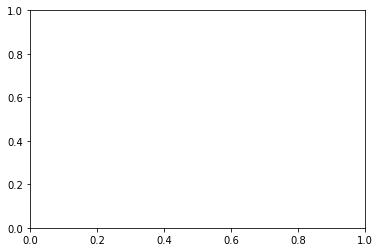

In [74]:
# Plot 2d array of latitude and longitude on a map
import matplotlib.pyplot as plt

# plot
plt.plot(df['Longitude'], df['Latitude'], linewidth=0.3)
plt.show()

In [45]:
len(data)/60/60

13.34388888888889